# Challenge 2 - Logistic Regression

## 1/ Data exploration

Before creating our model let's just **import** the dataset and take a look at the **general info** about our dataset.<br>

In [2]:
# The usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

<details>
  <summary>Hint</summary>
  You will probably need the read_csv method... Do your remember its library ?
</details>
<details>
  <summary>View solution</summary>

```python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
```
</details>

In [4]:
# Dataset import
csvfile = "data/Graduate_Admission.csv"
gadm_df = pd.read_csv(csvfile, decimal=".")

<details>
  <summary>Solution</summary>
  
```python
file = "data/Graduate_Admission.csv"
df = pd.read_csv(file, decimal=".")
```

</details>

In [5]:
# Dataset quick info
gadm_df

,Rating,CGPA,Admited
0,1,4.79,0
1,1,5.33,0
2,1,5.70,0
3,1,5.05,0
4,1,5.33,0
...,...,...,...
1535,5,8.79,1
1536,5,8.03,0
1537,5,8.85,0
1538,5,8.99,0


In [9]:
gadm_df.dtypes

Rating       int64
CGPA       float64
Admited      int64
dtype: object

<details>
  <summary>Hint</summary>
  Remember: you have already used methods such as describe, info, head, tail, etc.
</details>

<details>
  <summary>View solution</summary>

```python
df.info()
```
</details>

### How many rows do we have in our dataframe?

In [10]:
# Enter the answer
gadm_df.count

<bound method DataFrame.count of       Rating  CGPA  Admited
0          1  4.79        0
1          1  5.33        0
2          1  5.70        0
3          1  5.05        0
4          1  5.33        0
...      ...   ...      ...
1535       5  8.79        1
1536       5  8.03        0
1537       5  8.85        0
1538       5  8.99        0
1539       5  8.74        0

[1540 rows x 3 columns]>

<details>
  <summary>View solution</summary>

```python
df.shape[0]
```
</details>

### Which word best describe each columns?

In [5]:
type_a = "Binary"
type_b = "Discrete"
type_c = "Continuous"

CGPA = type_c # replace by the right type
Rating = type_b # replace by the right type
Admited = type_a # replace by the right type

<details>
  <summary>View solution</summary>

```python
CGPA = type_c
Rating = type_b
Admited = type_a
```
</details>

### Ploting our data
We can do a simple **pair-plot** of our dataframe to visualise the **relations** between our **columns**.

<details>
  <summary>Hint</summary>
  <a href="https://seaborn.pydata.org/generated/seaborn.pairplot.html">[Doc] seaborn.pydata.org</a>
</details>

In [14]:
# Pair-plot
import seaborn as sns

C:\Users\Le Wagon 1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Le Wagon 1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


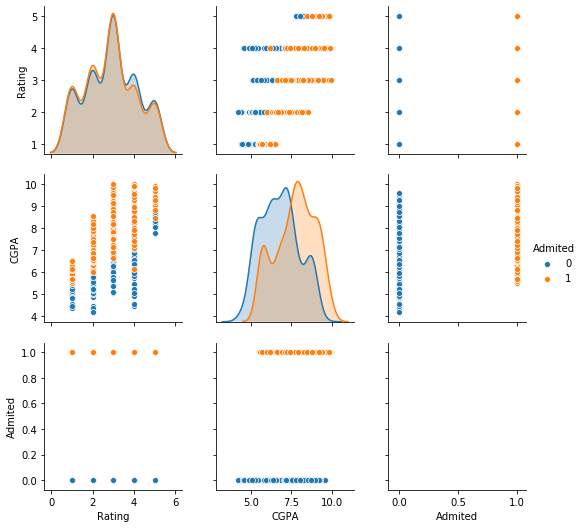

In [18]:
sns.pairplot(gadm_df, hue="Admited")

<details>
  <summary>View solution</summary>
 
```python
sns.pairplot(df, hue="Admited")
```
</details>

We would also like to observe more clearly the relation **for each rating**, between the **CGPA** and the **Admission**.<br>
That way we could start **estimating** what **CGPA** you need to be **admited** in each school.

**Help:** Scatter plot **Rating** vs. **CGPA** for **Admited** 1 and 0.

<details>
  <summary>Hint</summary>
  <a href="https://seaborn.pydata.org/generated/seaborn.scatterplot.html">[Doc] seaborn.pydata.org</a>
</details>

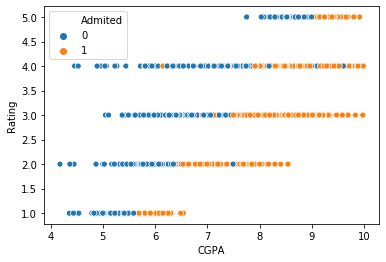

In [21]:
# Complex admission plot
sns.scatterplot(x="CGPA", y="Rating", hue="Admited", data=gadm_df)

C:\Users\Le Wagon 1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


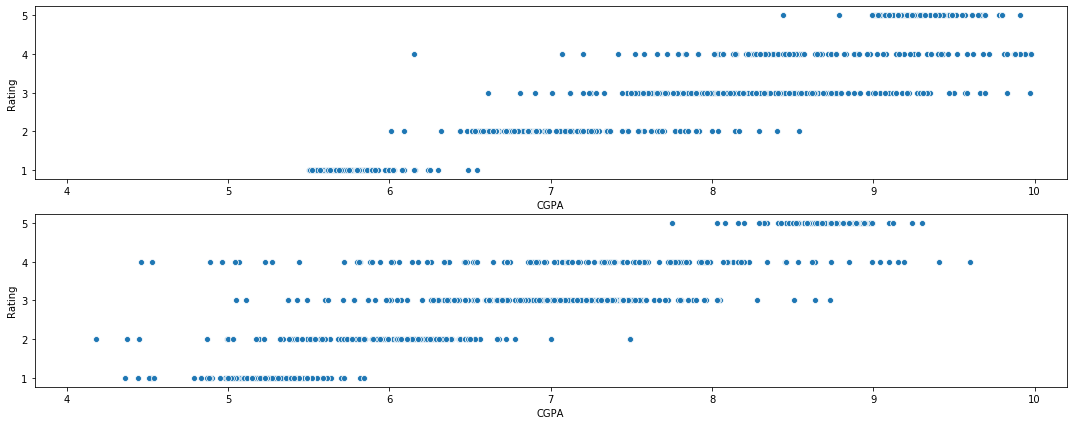

In [23]:
fig, ax = plt.subplots(2,1)
sns.scatterplot(x="CGPA", y='Rating', data=gadm_df[gadm_df["Admited"] == 1], ax=ax[0]).set(xlim=(3.8, 10.2))
sns.scatterplot(x="CGPA", y='Rating', data=gadm_df[gadm_df["Admited"] == 0], ax=ax[1]).set(xlim=(3.8, 10.2))
fig.set_size_inches(18.5, 7)
fig.show()

<details>
  <summary>View solution</summary>
 
```python
fig, ax = plt.subplots(2,1)
sns.scatterplot(x="CGPA", y='Rating', data=df[df["Admited"] == 1], ax=ax[0]).set(xlim=(3.8, 10.2))
sns.scatterplot(x="CGPA", y='Rating', data=df[df["Admited"] == 0], ax=ax[1]).set(xlim=(3.8, 10.2))
fig.set_size_inches(18.5, 7)
fig.show()
```
</details>

## 2/ Creating a model

If we want to **predict** students **admissions** in a school we will need to create a model.
The model will also help us to get some insight about the **probability** for a student to enter a school.

What is the **type of the task** that we are trying to do here, **Regression** or **Classification**?

In [24]:
# Choose your answer
answer_a = "Regression"
answer_b = "Classification"

question_task_type = answer_b # replace by the right variable

<details>
  <summary>View solution</summary>
 
```python
question_task_type = answer_b
```
</details>

### Training

For this exercise we are going to use a **Logistic Regression** model. <br>
Documentation: [scikit-learn.org/sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [34]:
gadm_df['Rating']

0       1
1       1
2       1
3       1
4       1
       ..
1535    5
1536    5
1537    5
1538    5
1539    5
Name: Rating, Length: 1540, dtype: int64

In [36]:
# Separate the features (X = ['Rating', 'CGPA']) from the target variable (y = "Admited")
X = gadm_df.drop(columns=['Admited'])
Y = gadm_df['Admited']

<details>
  <summary>View solution</summary>
 
```python
X = df.drop(columns=['Admited'])
y = df['Admited']
```
</details>

In [10]:
# Import the Logistic Regression model
from sklearn.linear_model import LogisticRegression

<details>
  <summary>View solution</summary>
 
```python
from sklearn.linear_model import LogisticRegression
```
</details>

In [37]:
# Train the model with the prepared data
model=LogisticRegression()
model.fit(X, Y)

C:\Users\Le Wagon 1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

<details>
  <summary>View solution</summary>
 
```python
logmodel = LogisticRegression()
logmodel.fit(X, y)
```
</details>

### Test the model

Before we start using our model let's just make sure the **predictions** are working.<br>
So let's make two easy predictions.<br>
For a school **rated 5**:
- a student with a **CGPA of 5** should **not be** admited.
- a student with a **CGPA of 10** should **be** admited.

You can use the following dataset: `{"Rating": [5,5], "CGPA": [5,10]}`

In [51]:
test_data = {"Rating": [5,5], "CGPA": [5,10]}

## create dataset
test_df=pd.DataFrame(test_data)
test_df

,Rating,CGPA
0,5,5
1,5,10


In [49]:
## Compute the model prediction for this test data
pred=model.predict(test_df)

In [50]:
pred

array([0, 1], dtype=int64)

<details>
  <summary>View solution</summary>
 
```python
test_df = pd.DataFrame(data=test_data)
predictions = logmodel.predict(test_df)
predictions
```
</details>

## 3/ Using our model

Nice! Now that our **model is ready** we can start looking for **answers** to our **initial questions**. 🚀 

1. If your **CGPA is 7.8**, what is the **probability** that you will be accepted in an university with a **rating of 3**?

In [53]:
# Create a test dataset as previously and make the predictions.
test_data2 = {"Rating": [3], "CGPA": [7.8]}

## create dataset
test_df2=pd.DataFrame(test_data2)
test_df2

,Rating,CGPA
0,3,7.8


In [56]:
pred=model.predict_proba(test_df2)
pred

array([[0.25898219, 0.74101781]])

<details>
  <summary>View solution</summary>
 
```python
data = {"Rating": [3], "CGPA": [7.8]}
question_df = pd.DataFrame(data=data)
predictions = logmodel.predict_proba(question_df)
predictions
```
</details>

In [57]:
# Enter your answer to question 1 here

question_1_answer = 0.74101781 # replace by the right answer, rounded to the second decimal (ex: 4.32)

<details>
  <summary>View solution</summary>
 
```python
question_1_answer = 0.74
```
</details>

2. If your **CGPA is 8.5**, what is the rating of the **best universities** you can apply to and have a probability of more than **50%** to be accepted?

In [58]:
# Create a test dataset as previously and make the predictions.
test_data3 = {"Rating": [1,2,3,4,5], "CGPA": [8.5,8.5,8.5,8.5,8.5]}

## create dataset
test_df3=pd.DataFrame(test_data3)
test_df3

,Rating,CGPA
0,1,8.5
1,2,8.5
2,3,8.5
3,4,8.5
4,5,8.5


In [59]:
pred=model.predict_proba(test_df3)
pred

array([[6.82284795e-04, 9.99317715e-01],
       [6.40479519e-03, 9.93595205e-01],
       [5.73682343e-02, 9.42631766e-01],
       [3.64916710e-01, 6.35083290e-01],
       [8.44357061e-01, 1.55642939e-01]])

<details>
  <summary>View solution</summary>
 
```python
data = {"Rating": [1,2,3,4,5], "CGPA": [8.5,8.5,8.5,8.5,8.5]}
question_df = pd.DataFrame(data=data)
predictions = logmodel.predict_proba(question_df)
predictions
```
</details>

In [60]:
# Enter your answer to question 2 here

question_2_answer = 4 # replace by the right rating number

<details>
  <summary>View solution</summary>
 
```python
question_2_answer = 4 
```
</details>

3. What should be your CGPA in order to have a probabilty of **80%** to enter in the **best rated** university?

In [67]:
# Create a test dataset as previously and make the predictions.
#test_data4= {"Rating": [5, 5, 5, 5, 5, 5, 5, 5, 5], "CGPA": [8, 8.3, 8.6, 8.9, 9.2, 9.4, 9.6, 9.7, 9.9]}
#test_data4= {"Rating": [5, 5, 5, 5], "CGPA": [9.7, 9.75, 9.8, 9.9]}
test_data4= {"Rating": [5, 5, 5, 5], "CGPA": [9.73, 9.732, 9.735, 9.738]}
## create dataset
test_df4=pd.DataFrame(test_data4)
test_df4

,Rating,CGPA
0,5,9.730
1,5,9.732
2,5,9.735
3,5,9.738


In [68]:
pred=model.predict_proba(test_df4)
pred

array([[0.20095544, 0.79904456],
       [0.20015473, 0.79984527],
       [0.19895816, 0.80104184],
       [0.19776696, 0.80223304]])

<details>
  <summary>View solution</summary>
 
```python
data = {"Rating": [5,5,5,5,5], "CGPA": [8,8.5,9,9.5,9.8]}
question_df = pd.DataFrame(data=data)
predictions = logmodel.predict_proba(question_df)
predictions[:,1]
```
</details>

In [18]:
# Enter your answer to question 3 here

question_3_answer = 9.735 # replace by the right answer, rounded to the first decimal (ex: 4.3)

<details>
  <summary>View solution</summary>
 
```python
question_3_answer = 9.8
```
</details>

4. With the help of you model, can you plot the **probability** to be **admited** in an university **rated 4**, by **CGPA**?

In [71]:
# Create a line-plot of the probability to be admited in a university rated 4, by CGPA
test_data5= {"Rating": [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], "CGPA": [4, 5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]}
## create dataset
test_df5=pd.DataFrame(test_data5)
test_df5

,Rating,CGPA
0,4,4.0
1,4,5.0
2,4,6.0
3,4,6.5
4,4,7.0
5,4,7.5
6,4,8.0
7,4,8.5
8,4,9.0
9,4,9.5


In [72]:
pred=model.predict_proba(test_df5)
pred

array([[9.99977058e-01, 2.29415250e-05],
       [9.99721416e-01, 2.78584359e-04],
       [9.96626694e-01, 3.37330597e-03],
       [9.88341226e-01, 1.16587737e-02],
       [9.60511444e-01, 3.94885557e-02],
       [8.74674887e-01, 1.25325113e-01],
       [6.66951007e-01, 3.33048993e-01],
       [3.64916710e-01, 6.35083290e-01],
       [1.41534739e-01, 8.58465261e-01],
       [4.51693588e-02, 9.54830641e-01],
       [1.33918183e-02, 9.86608182e-01]])

<details>
  <summary>View solution</summary>
 
```python
data = {"Rating": [4,4,4,4,4,4,4,4,4,4,4], "CGPA": [5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]}
question_df = pd.DataFrame(data=data)
predictions = logmodel.predict_proba(question_df)
predictions[:,1]
plt.plot(question_df["CGPA"],predictions[:,1]) 
```
</details>

### (Optional)

This **dataset** has been **generated** and the model behind it look like this:
<details>
  <summary>🚫Open only if you have completed the exercise 🚫</summary>
    <img src="https://i.ibb.co/n67YMx5/Screen-Shot-2019-09-24-at-20-31-13.png" alt="Screen-Shot-2019-09-24-at-20-31-13" border="0" width="400px">
</details>

Create a **line plot** of the model you have created.

In [78]:
gadm_df_final=gadm_df.drop(columns=['Admited'])
pred_final=model.predict_proba(gadm_df_final)

In [82]:
pred_final

array([[0.8781036 , 0.1218964 ],
       [0.65162685, 0.34837315],
       [0.42611923, 0.57388077],
       ...,
       [0.69361002, 0.30638998],
       [0.6147841 , 0.3852159 ],
       [0.74870626, 0.25129374]])

Text(0, 0.5, 'Admitted')

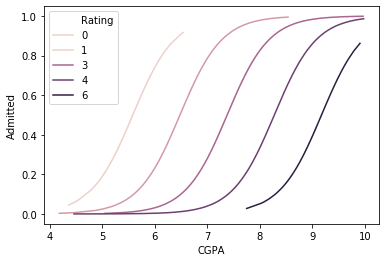

In [86]:
## Your code here
lp = sns.lineplot(x="CGPA", y=pred_final[:,1] , data=gadm_df_final, hue="Rating")
lp.set_ylabel("Admitted")

<details>
  <summary>View solution</summary>
 
```python
data = {"Rating": [1,1,1,1,1,1,1,1,1,1,1], "CGPA": [5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]}
question_df = pd.DataFrame(data=data)
predictions = logmodel.predict_proba(question_df)
predictions[:,1]
plt.plot(question_df["CGPA"],predictions[:,1])

data = {"Rating": [2,2,2,2,2,2,2,2,2,2,2], "CGPA": [5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]}
question_df = pd.DataFrame(data=data)
predictions = logmodel.predict_proba(question_df)
predictions[:,1]
plt.plot(question_df["CGPA"],predictions[:,1]) 

data = {"Rating": [3,3,3,3,3,3,3,3,3,3,3], "CGPA": [5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]}
question_df = pd.DataFrame(data=data)
predictions = logmodel.predict_proba(question_df)
predictions[:,1]
plt.plot(question_df["CGPA"],predictions[:,1])

data = {"Rating": [4,4,4,4,4,4,4,4,4,4,4], "CGPA": [5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]}
question_df = pd.DataFrame(data=data)
predictions = logmodel.predict_proba(question_df)
predictions[:,1]
plt.plot(question_df["CGPA"],predictions[:,1]) 

data = {"Rating": [5,5,5,5,5,5,5,5,5,5,5], "CGPA": [5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]}
question_df = pd.DataFrame(data=data)
predictions = logmodel.predict_proba(question_df)
predictions[:,1]
plt.plot(question_df["CGPA"],predictions[:,1]) 
plt.show()
```
</details>